In [1]:
conda install -c conda-forge fbprophet

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Affinity\Anaconda3

  added / updated specs:
    - fbprophet


The following packages will be UPDATED:

  anaconda                                    custom-py37_1 --> 2019.03-py37_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2019.6.1~ --> pkgs/main::ca-certificates-2019.1.23-0
  openssl            conda-forge::openssl-1.1.1c-hfa6e2cd_0 --> pkgs/main::openssl-1.1.1b-he774522_1

The following packages will be DOWNGRADED:

  certifi                                  2019.6.16-py37_1 --> 2019.3.9-py37_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os

from fbprophet import Prophet


E0814 22:37:30.955180  8616 plot.py:39] Importing plotly failed. Interactive plots will not work.


In [3]:
data=pd.read_csv("fuku_data")

C:\Users\Affinity\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (2,3,4,5,6,7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

In [4]:
colum=data.iloc[135792,0:9]
colum
data=data.iloc[:-1,0:9]
data.columns=[i for i in colum]

data.head()
data.tail()

,Date,Time,MP-1(microSv/h),MP-2(microSv/h),MP-3(microSv/h),MP-4(microSv/h),MP-5(microSv/h),MP-6(microSv/h),MP-7(microSv/h)
135787,2019/08/10,23:10,0.194,0.174,0.297,0.281,0.274,0.147,0.092
135788,2019/08/10,23:20,0.195,0.173,0.297,0.279,0.273,0.147,0.092
135789,2019/08/10,23:30,0.192,0.173,0.297,0.278,0.271,0.148,0.091
135790,2019/08/10,23:40,0.191,0.173,0.300,0.281,0.270,0.148,0.090
135791,2019/08/10,23:50,0.194,0.174,0.299,0.282,0.274,0.148,0.091


In [5]:
data["DateTime"]=pd.to_datetime(data['Date'] + ' ' + data['Time'])

#data['DateTime'] = data['DateTime'].astype('datetime64[ns]')

data=data.drop(["Date","Time"],axis=1)

cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data=data[cols]

data.head()

,DateTime,MP-1(microSv/h),MP-2(microSv/h),MP-3(microSv/h),MP-4(microSv/h),MP-5(microSv/h),MP-6(microSv/h),MP-7(microSv/h)
0,2017-01-01 00:00:00,0.39,0.239,0.404,0.376,0.34,0.194,0.166
1,2017-01-01 00:10:00,0.389,0.24,0.406,0.373,0.339,0.194,0.165
2,2017-01-01 00:20:00,0.39,0.239,0.403,0.375,0.341,0.194,0.167
3,2017-01-01 00:30:00,0.39,0.24,0.403,0.375,0.34,0.193,0.166
4,2017-01-01 00:40:00,0.39,0.24,0.404,0.375,0.34,0.194,0.166


In [6]:
data.describe()

,DateTime,MP-1(microSv/h),MP-2(microSv/h),MP-3(microSv/h),MP-4(microSv/h),MP-5(microSv/h),MP-6(microSv/h),MP-7(microSv/h)
count,135792,135792.00,135792.000,135792.000,135792.000,135792.000,135792.000,135792.000
unique,135792,397.00,183.000,309.000,274.000,187.000,157.000,190.000
top,2017-04-19 18:30:00,0.34,0.192,0.312,0.297,0.279,0.155,0.095
freq,1,1935.00,4408.000,2430.000,2960.000,4392.000,5528.000,10497.000
first,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-08-10 23:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# MP1

In [7]:

mp1=data[["DateTime","MP-1(microSv/h)"]].reset_index(drop=True)
mp1=mp1.rename(columns={ "DateTime" : "ds", "MP-1(microSv/h)" : "y"})
mp1.head()

mp1=mp1[mp1["y"] != '-']
# mp1=mp1.values

#sample=mp1.iloc[:500,:]
#sample.tail()
len(mp1)
mp1.head()

,ds,y
0,2017-01-01 00:00:00,0.39
1,2017-01-01 00:10:00,0.389
2,2017-01-01 00:20:00,0.39
3,2017-01-01 00:30:00,0.39
4,2017-01-01 00:40:00,0.39


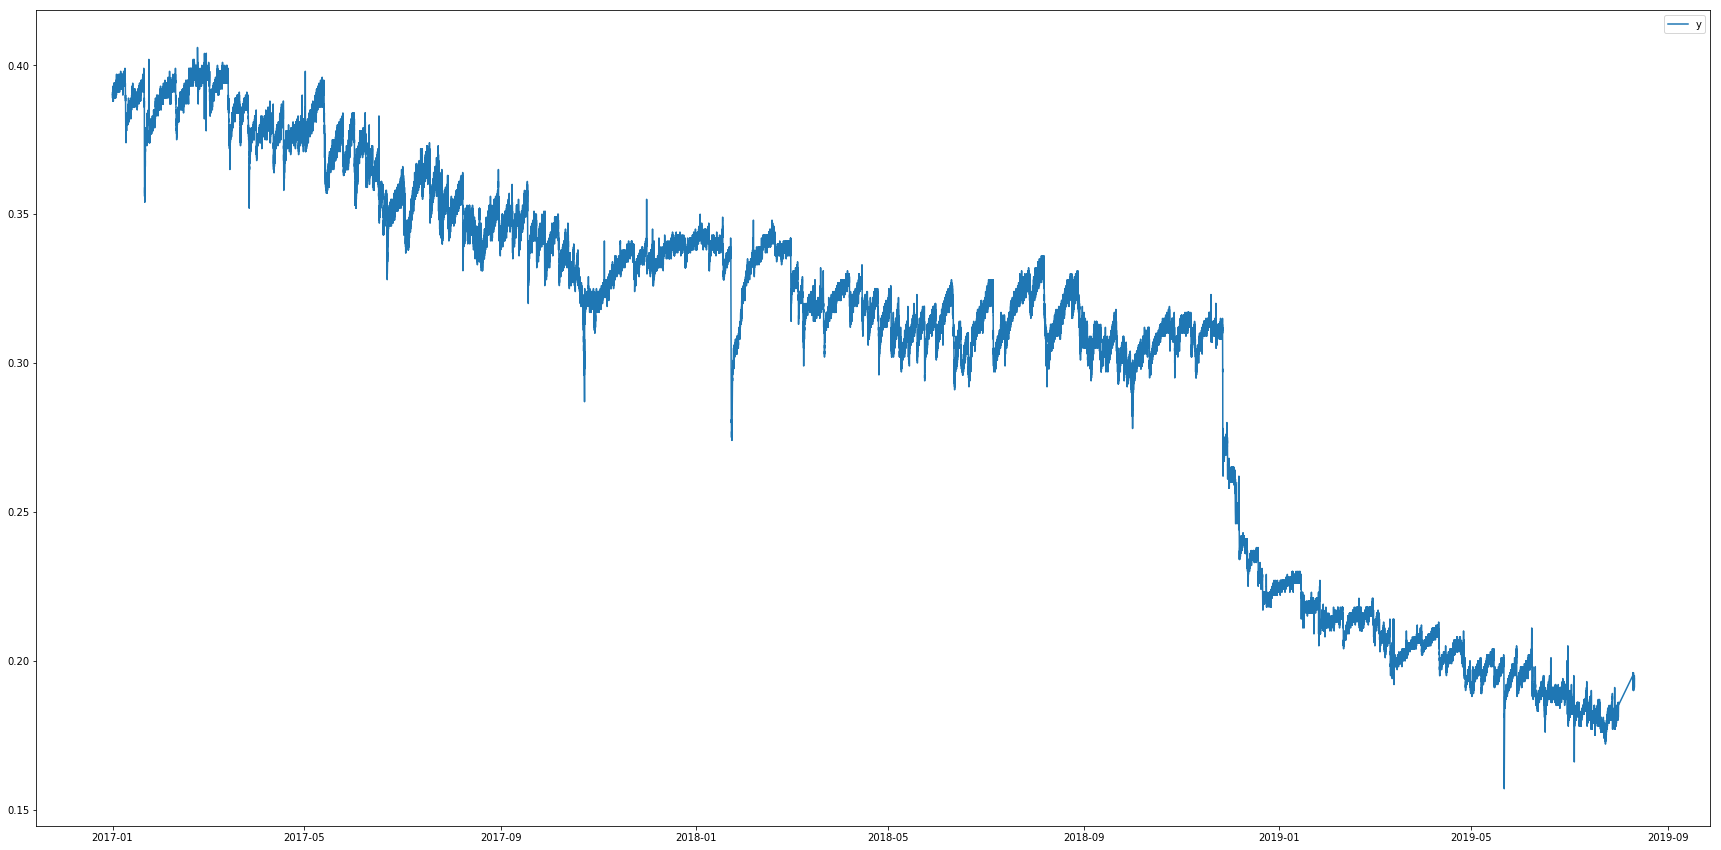

In [8]:
#sample.plot( x= "DateTime", y="MP-1(microSv/h)", figsize=(16,8))

#plt.plot(mp1["ds"], mp1["y"])

fig=plt.figure(facecolor="white", figsize=(30,15))
ax=fig.add_subplot(111)
ax.plot(mp1["ds"], mp1["y"])
ax.legend()
plt.show()

# Fit

In [9]:
model=Prophet()
model.fit(mp1)

C:\Users\Affinity\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


# Predict

In [15]:
future=model.make_future_dataframe(periods=180)

forecast=model.predict(future)

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
135491,2020-02-02 23:50:00,0.151361,-0.114578,0.399930,-0.111156,0.406019,-0.004952,-0.004952,-0.004952,0.000333,...,0.000563,0.000563,0.000563,-0.005848,-0.005848,-0.005848,0.0,0.0,0.0,0.146410
135492,2020-02-03 23:50:00,0.151172,-0.120232,0.404737,-0.113291,0.408240,-0.005023,-0.005023,-0.005023,0.000333,...,0.000004,0.000004,0.000004,-0.005360,-0.005360,-0.005360,0.0,0.0,0.0,0.146149
135493,2020-02-04 23:50:00,0.150983,-0.117488,0.405862,-0.115426,0.410173,-0.004837,-0.004837,-0.004837,0.000333,...,-0.000342,-0.000342,-0.000342,-0.004827,-0.004827,-0.004827,0.0,0.0,0.0,0.146147
135494,2020-02-05 23:50:00,0.150794,-0.120143,0.406021,-0.117561,0.413054,-0.003879,-0.003879,-0.003879,0.000333,...,0.000054,0.000054,0.000054,-0.004266,-0.004266,-0.004266,0.0,0.0,0.0,0.146915
135495,2020-02-06 23:50:00,0.150605,-0.124703,0.409610,-0.120311,0.414485,-0.003749,-0.003749,-0.003749,0.000333,...,-0.000393,-0.000393,-0.000393,-0.003689,-0.003689,-0.003689,0.0,0.0,0.0,0.146856


# graph

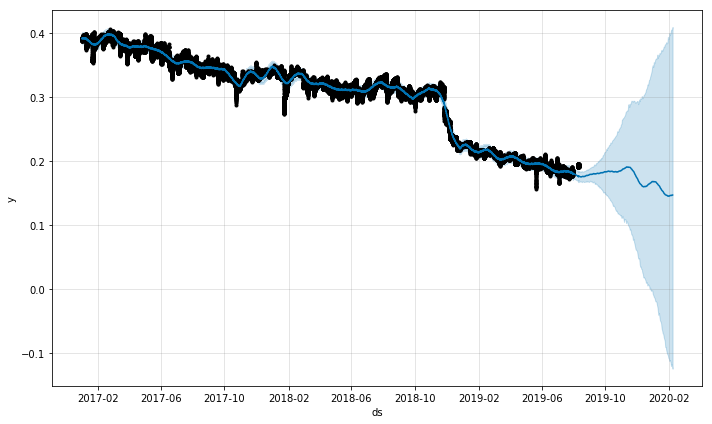

In [16]:
fig1=model.plot(forecast)

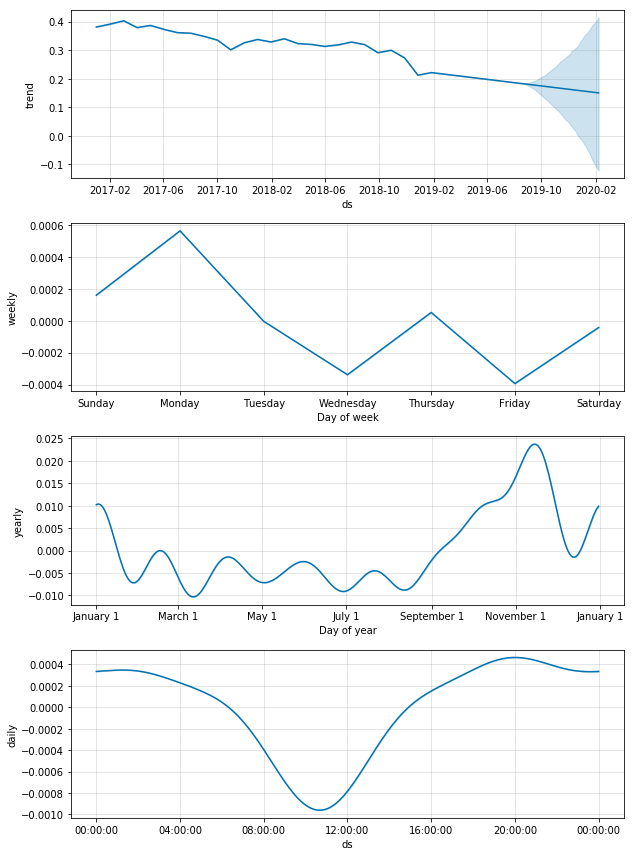

In [17]:
fig2=model.plot_components(forecast)